In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ashok\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
flightsinfo = pd.read_csv("flights.csv")

C:\Users\ashok\AppData\Local\Temp\ipykernel_9704\4255885707.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flightsinfo = pd.read_csv("flights.csv")


In [4]:
list(flightsinfo.columns) 

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [5]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [6]:
flightsinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [7]:
flightsinfo.shape

(5819079, 31)

In [8]:
flightsinfo.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [9]:
flightsinfo.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flightsinfo

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
airlinecompanies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [12]:
airlinecompanies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

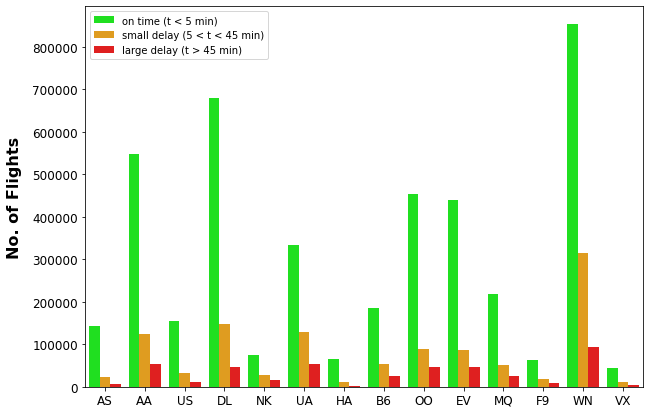

In [13]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flightsinfo['DELAY_LEVEL'] = flightsinfo['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=flightsinfo, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

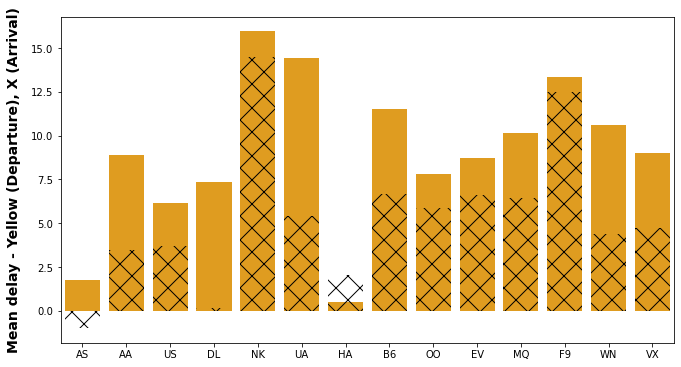

In [14]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Yellow (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

In [15]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap

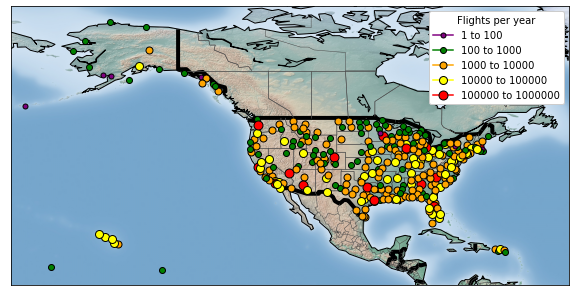

In [16]:
import matplotlib.pyplot as plt
from collections import OrderedDict
flightcount = flightsinfo['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(10,10))

colors = ['purple', 'green', 'orange','yellow', 'red', 'lightblue']
size = [1, 100, 1000, 10000, 100000, 1000000]
labels = ["1 to 100", "100 to 1000", "1000 to 10000", "10000 to 100000", "100000 to 1000000"]

map = Basemap(llcrnrlon=-180, urcrnrlon=-50, llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 4)
map.drawstates(color='0.3')

for index, (code, y,x) in airport[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size) if val < flightcount[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+5, markeredgewidth = 1, color = colors[ind], markeredgecolor='k', label = labels[ind])

handles, labels = plt.gca().get_legend_handles_labels()
labels_ord = OrderedDict(zip(labels, handles))
keys = ('1 to 100','100 to 1000', '1000 to 10000', '10000 to 100000', '100000 to 1000000')
lnew = OrderedDict()
for item in keys:
    lnew[item] = labels_ord[item]
plt.legend(lnew.values(), lnew.keys(), loc = 1, prop= {'size':10}, title='Flights per year', frameon = True, framealpha = 1)
plt.show()

In [17]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [18]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [19]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [20]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [21]:
flightsinfo_NULL = flightsinfo.isnull().sum()*100/flightsinfo.shape[0]
flightsinfo_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

I drop all the rows for some attributes which have null values as they make up a small percentage of the dataset


In [22]:
flightsinfo1 = flightsinfo.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [23]:
flightsinfo1.shape

(5714008, 32)

In [24]:
flightsinfo1.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
DELAY_LEVEL                  0
dtype: i

In [25]:
flightsinfo_modified = flightsinfo1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flightsinfo_modified = flightsinfo_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [26]:
flightsinfo_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063439 entries, 27 to 5819071
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  object 
 1   ORIGIN_AIRPORT       1063439 non-null  object 
 2   DESTINATION_AIRPORT  1063439 non-null  object 
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
 14  DELAY_LEVEL          1063439 non-null  int64  
dt

In [27]:
Flight_Delays = flightsinfo_modified

Dropping all the contributing factors of delays as we are only going to focus on the over all delay

In [28]:
flightsinfo2 = flightsinfo1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [29]:
flightsinfo2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
DELAY_LEVEL            0
dtype: int64

In [30]:
flightsinfo2.shape

(5714008, 26)

In [31]:
flightsinfo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [32]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [33]:
flightsinfo2.DEPARTURE_TIME

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
5819074    2355.0
5819075    2355.0
5819076    2350.0
5819077    2353.0
5819078      14.0
Name: DEPARTURE_TIME, Length: 5714008, dtype: float64

The times are not in the correct format so i will transform them into HH:MM format


In [34]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [35]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Departure']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: Actual_Departure, Length: 5714008, dtype: object

In [36]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_LEVEL',
       'Actual_Departure'],
      dtype='object')

Transform year month and day into date time format

In [37]:
flightsinfo2['Date'] = pd.to_datetime(flightsinfo2[['YEAR','MONTH','DAY']])
flightsinfo2.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: Date, Length: 5714008, dtype: datetime64[ns]

In [38]:
flightsinfo2['Day'] = flightsinfo2['Date'].dt.day_name()
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DELAY_LEVEL,Actual_Departure,Date,Day
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,4.0,430,408.0,-22.0,0,0,0,23:54:00,2015-01-01,Thursday
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,4.0,750,741.0,-9.0,0,0,0,00:02:00,2015-01-01,Thursday
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,11.0,806,811.0,5.0,0,0,0,00:18:00,2015-01-01,Thursday
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,8.0,805,756.0,-9.0,0,0,0,00:15:00,2015-01-01,Thursday
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,5.0,320,259.0,-21.0,0,0,0,00:24:00,2015-01-01,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,4.0,819,753.0,-26.0,0,0,0,23:55:00,2015-12-31,Thursday
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,3.0,446,430.0,-16.0,0,0,0,23:55:00,2015-12-31,Thursday
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,8.0,440,432.0,-8.0,0,0,0,23:50:00,2015-12-31,Thursday
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,3.0,340,330.0,-10.0,0,0,0,23:53:00,2015-12-31,Thursday


In [39]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Arrival'] =flightsinfo1['SCHEDULED_ARRIVAL'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Departure'] =flightsinfo1['SCHEDULED_DEPARTURE'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Arrival'] =flightsinfo2['ARRIVAL_TIME'].apply(CreateTimeFormatted)

In [40]:
flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [41]:
flightsinfo2 = flightsinfo2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [42]:
flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [43]:
flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [44]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DELAY_LEVEL', 'Actual_Departure', 'Date',
       'Day', 'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival',
       'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [45]:
flightsinfo2 = flightsinfo2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [46]:
flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [47]:
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,2015,12,29,2,2734,N884AS,MEI,PIB,2046,2037.0,...,21:20:00,20:46:00,21:02:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221996,2015,12,30,3,2730,N880AS,MEI,PIB,1435,1616.0,...,15:09:00,14:35:00,16:39:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221997,2015,12,30,3,2734,N907EV,MEI,PIB,2046,2056.0,...,21:20:00,20:46:00,21:30:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
5221998,2015,12,31,4,2730,N907EV,MEI,PIB,1435,1421.0,...,15:09:00,14:35:00,14:51:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


In [48]:
data_vizual = pd.DataFrame(flightsinfo2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [49]:
flightsinfo2.DEPARTURE_TIME.dtype

dtype('float64')

In [50]:
data_vizual = data_vizual.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [51]:
data_vizual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219244 entries, 0 to 5221999
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   AIRLINE              object        
 1   Org_Airport_Name     object        
 2   Origin_city          object        
 3   Dest_Airport_Name    object        
 4   Destination_city     object        
 5   ORIGIN_AIRPORT       object        
 6   DESTINATION_AIRPORT  object        
 7   DISTANCE             int64         
 8   Actual_Departure     object        
 9   Date                 datetime64[ns]
 10  Day                  object        
 11  Scheduled_Departure  object        
 12  DEPARTURE_DELAY      float64       
 13  Actual_Arrival       object        
 14  Scheduled_Arrival    object        
 15  ARRIVAL_DELAY        float64       
 16  SCHEDULED_TIME       float64       
 17  ELAPSED_TIME         float64       
 18  AIR_TIME             float64       
 19  TAXI_IN              

In [52]:
Flights = data_vizual
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,20:37:00,2015-12-29,...,-9.0,21:02:00,21:20:00,-18.0,34.0,25.0,17.0,2.0,6.0,0
5221996,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,16:16:00,2015-12-30,...,101.0,16:39:00,15:09:00,90.0,34.0,23.0,14.0,5.0,4.0,0
5221997,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,20:56:00,2015-12-30,...,10.0,21:30:00,21:20:00,10.0,34.0,34.0,18.0,4.0,12.0,0
5221998,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69,14:21:00,2015-12-31,...,-14.0,14:51:00,15:09:00,-18.0,34.0,30.0,18.0,3.0,9.0,0


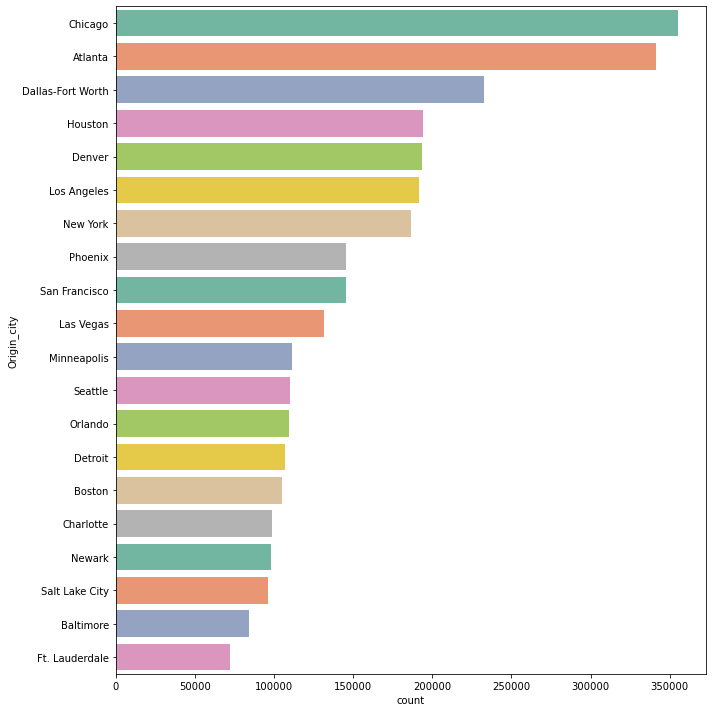

In [53]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(y=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index,palette="Set2")
axis.set_yticklabels(axis.get_yticklabels())
plt.tight_layout()
plt.show()

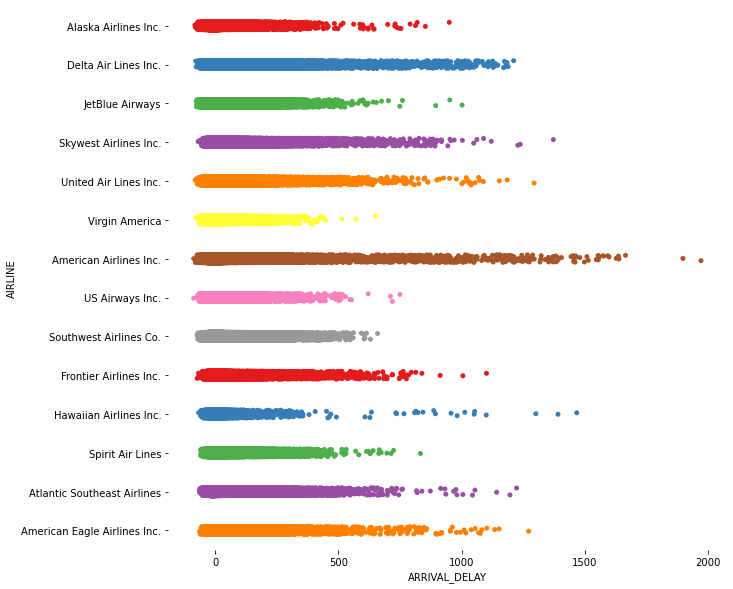

In [54]:
axis = plt.subplots(figsize=(10,10))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = Flights, dodge=True, jitter=True,palette="Set1")
plt.show()

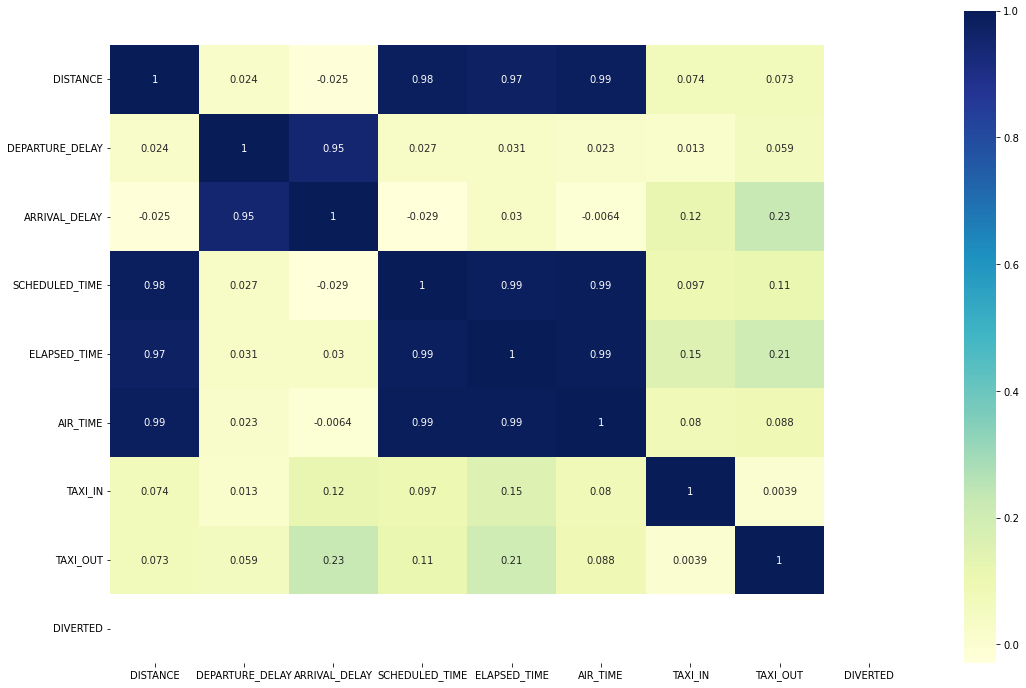

In [55]:
axis = plt.subplots(figsize=(18,12))
sns.heatmap(Flights.corr(),annot = True,cmap="YlGnBu")
b, t = plt.ylim() # discover the values for bottom and top
#b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [56]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0


Removing columns that are not needed fo prediction

In [57]:
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [58]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

Air Time distribution histogram

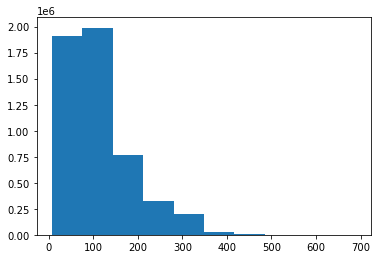

In [59]:
plt.hist(Flights1['AIR_TIME'])
plt.show()

Elapsed Time distribution histogram

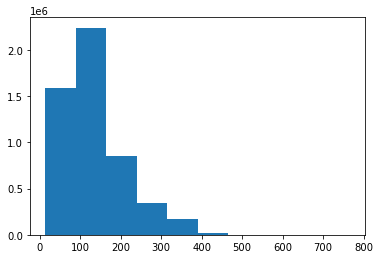

In [60]:
plt.hist(Flights1['ELAPSED_TIME'])
plt.show()




**Regression Starts to predict Arrival Delay**

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

Applying Label encoder to convert text values to numbers

In [63]:
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [64]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [65]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219244 entries, 0 to 5221999
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AIRLINE              int32  
 1   ORIGIN_AIRPORT       int32  
 2   DESTINATION_AIRPORT  int32  
 3   DISTANCE             int64  
 4   Day                  int32  
 5   DEPARTURE_DELAY      float64
 6   ARRIVAL_DELAY        float64
 7   SCHEDULED_TIME       float64
 8   ELAPSED_TIME         float64
 9   AIR_TIME             float64
 10  TAXI_IN              float64
 11  TAXI_OUT             float64
 12  DIVERTED             int64  
dtypes: float64(7), int32(4), int64(2)
memory usage: 477.8 MB


In [66]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(5219244, 12)

In [67]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

Split into train and test sets

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

Applying Standard Scalar

In [69]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

Applying Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

fitResult = LinR.fit(X_train_sc,y_train)
y_pred = fitResult.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, y_pred))
print ('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('R2:' , r2_score(y_test, y_pred))

MAE: 1.5327892902043807e-06
MSE: 3.0655780798899095e-06
RMSE: 0.0017508792305267402
R2: 0.9999999980588673


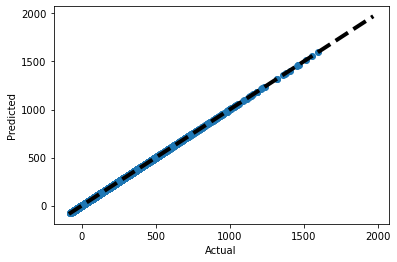

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Random Forest Regressor

In [72]:
# from sklearn.ensemble import RandomForestRegressor
# Rfc = RandomForestRegressor(random_state=2)

# fitResultR = Rfc.fit(X_train_sc,y_train)
# predictedValues = fitResultR.predict(X_test_sc)
# print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
# print ('MSE:' , mean_squared_error(y_test, predictedValues))
# print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
# print ('R2:' , r2_score(y_test, predictedValues))

In [73]:
# #import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(y_test, predictedValues)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# plt.show() 

Applying Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
Dtc = DecisionTreeRegressor(random_state = 2)

fitResultdtc = Dtc.fit(X_train_sc,y_train)
predictedValues = fitResultdtc.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 0.9508833080039945
MSE: 8.578144267637228
RMSE: 2.928846917754021
R2: 0.994568294675817


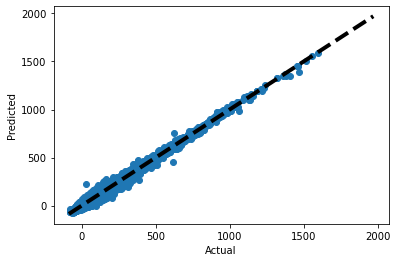

In [75]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

Applying Boosted Linear Regression

In [76]:
from sklearn.ensemble import AdaBoostRegressor
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)

fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
predictedValues = fitResultBl.predict(X_test_sc)
print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
print ('MSE:' , mean_squared_error(y_test, predictedValues))
print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
print ('R2:' , r2_score(y_test, predictedValues))

MAE: 1.53278962317542e-06
MSE: 3.0655780798899095e-06
RMSE: 0.0017508792305267402
R2: 0.9999999980588673


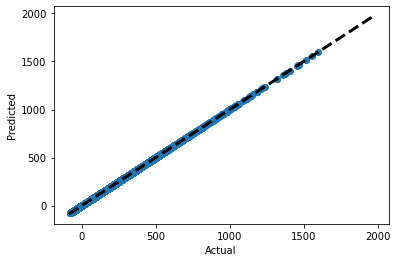

In [77]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValues)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show() 

In [78]:
import pickle
pickle.dump(Boost_Lin,open('model2.pkl','wb'))
model2=pickle.load(open('model2.pkl','rb'))

In [79]:
model2.predict(X_test_sc)

array([-21.,  15., -14., ...,  25., -14.,  44.])

In [80]:
#import pickle
pickle.dump(LinR,open('model3.pkl','wb'))
model3=pickle.load(open('model3.pkl','rb'))

In [81]:
model3.predict(X_test_sc)

array([-21.,  15., -14., ...,  25., -14.,  44.])

In [82]:
X_test

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Day,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
1331801,4,275,20,2182,5,8.0,281.0,252.0,230.0,6.0,16.0,0
4905297,9,113,283,1046,2,20.0,150.0,145.0,129.0,6.0,10.0,0
236036,11,227,237,1440,0,13.0,234.0,207.0,192.0,3.0,12.0,0
5220003,3,20,77,83,0,-4.0,42.0,41.0,21.0,3.0,17.0,0
3904446,11,20,66,226,5,-5.0,74.0,83.0,44.0,9.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3322861,1,66,39,728,4,-5.0,120.0,126.0,96.0,7.0,23.0,0
1200682,2,11,86,285,2,3.0,78.0,66.0,49.0,5.0,12.0,0
1256422,8,227,215,334,6,26.0,95.0,94.0,60.0,9.0,25.0,0
310169,1,175,222,2486,6,-6.0,343.0,335.0,313.0,5.0,17.0,0


In [83]:
y_test

1331801   -21.0
4905297    15.0
236036    -14.0
5220003    -5.0
3904446     4.0
           ... 
3322861     1.0
1200682    -9.0
1256422    25.0
310169    -14.0
3678972    44.0
Name: ARRIVAL_DELAY, Length: 1304811, dtype: float64

**Dropping Departure delay from set of attributes to try and predict Arrival Delay**

In [84]:
# X = Flights1.drop(['ARRIVAL_DELAY','DEPARTURE_DELAY'],axis = 1)
# X.shape

In [85]:
# y = Flights1['DEPARTURE_DELAY']
# y.head()

In [86]:
# X

In [87]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)
# sc1=StandardScaler()
# X_train_sc=sc1.fit_transform(X_train)
# X_test_sc=sc1.transform(X_test)

Applying MLP Neural Network

In [88]:
# from sklearn.neural_network import MLPRegressor
# mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

# mlp.fit(X_train_sc, y_train)

# predictedValues = mlp.predict(X_test_sc)
# print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
# print ('MSE:' , mean_squared_error(y_test, predictedValues))
# print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
# print ('R2:' , r2_score(y_test, predictedValues))

In [89]:
# #import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(y_test, predictedValues)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# plt.show() 

Applying Random Forest Regressor

In [90]:
# fitResultR = Rfc.fit(X_train_sc,y_train)
# predictedValues = fitResultR.predict(X_test_sc)
# print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
# print ('MSE:' , mean_squared_error(y_test, predictedValues))
# print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
# print ('R2:' , r2_score(y_test, predictedValues))

In [91]:
# #import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(y_test, predictedValues)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# plt.show() 

Applying Boosted Linear Regression

In [92]:
# fitResultBl = Boost_Lin.fit(X_train_sc,y_train)
# predictedValues = fitResultBl.predict(X_test_sc)
# print ('MAE:' ,  mean_absolute_error(y_test, predictedValues))
# print ('MSE:' , mean_squared_error(y_test, predictedValues))
# print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
# print ('R2:' , r2_score(y_test, predictedValues))

In [93]:
# #import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(y_test, predictedValues)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# plt.show() 

In [94]:
# X_test

In [95]:
# Flights1

In [96]:
# Flights1['ORIGIN_AIRPORT'] = Flights1['ORIGIN_AIRPORT'].astype(str)
# Flights1['DESTINATION_AIRPORT'] = Flights1['DESTINATION_AIRPORT'].astype(str)

In [97]:
# Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
# Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
# Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])

**Creating a new feature which has value only as 0 or 1 depending on it it is dealyed or not**

In [98]:
#Flights1['Is_Delayed'] = np.where(Flights1['ARRIVAL_DELAY']<=0, 0,1)

In [99]:
# Flights1

In [100]:
# X = Flights1.drop(['ARRIVAL_DELAY','Is_Delayed'],axis = 1)
# X.shape
# y = Flights1['Is_Delayed']
# y.head()

In [101]:
# X

In [102]:
# y

In [103]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [104]:
# y_train.value_counts()

Applying SMOTE to deal with class imbalance

In [105]:
# from imblearn.over_sampling import SMOTE

In [106]:
# smt = SMOTE()
# X_train, y_train = smt.fit_sample(X_train, y_train)

In [107]:
# pd.Series(y_train).value_counts()

In [108]:
# sc1=StandardScaler()
# X_train_sc=sc1.fit_transform(X_train)
# X_test_sc=sc1.transform(X_test)

In [109]:
# y_train

In [110]:
# X_test

Decision trees

In [111]:
# from sklearn.tree import DecisionTreeClassifier
# classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = None)
# classifierDT.fit(X_train_sc, y_train)

In [112]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(classifierDT, out_file=dot_data,  
 #               filled=True, rounded=True,
 #               special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [113]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [114]:
# from sklearn.metrics import confusion_matrix

In [115]:
# # Predicting the Test set results
# y_pred = classifierDT.predict(X_test)

# # Making the Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# score = classifierDT.score(X_test_sc,y_test)

In [116]:
# cm

In [117]:
# score

In [118]:
# print("F1 score :",f1_score(y_test, y_pred, average="macro"))
# print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
# print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

In [119]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the Decision tree classifier')
# fig.colorbar(cax)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

K nearest neighbours classifier

In [120]:
# from sklearn.neighbors import KNeighborsClassifier
# objClassifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
# objClassifier.fit(X_train_sc,y_train)

In [121]:
# y_pred=objClassifier.predict(X_test_sc)

# #Making the confussion matarix 

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred)

# score=objClassifier.score(X_test,y_test)

In [122]:
# cm

In [123]:
# score

In [124]:
# print("F1 score :",f1_score(y_test, y_pred, average="macro"))
# print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
# print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

In [125]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the K nearest classifier')
# fig.colorbar(cax)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

Logistic regression

In [126]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train_sc, y_train)

In [127]:
# # Predicting the Test set results
# y_pred = classifier.predict(X_test_sc)

# # Making the Confusion Matrix
# score = classifier.score(X_test_sc,y_test)
# cm = confusion_matrix(y_test, y_pred)

In [128]:
# cm

In [129]:
# score

In [130]:
# print("F1 score :",f1_score(y_test, y_pred, average="macro"))
# print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
# print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

In [131]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the logistic regression classifier')
# fig.colorbar(cax)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

Applying Naive Bayes

In [132]:
# from sklearn.naive_bayes import GaussianNB
# objclassifierGNB=GaussianNB()
# objclassifierGNB.fit(X_train_sc,y_train)

In [133]:
# # Predicting the Test set results
# y_pred = objclassifierGNB.predict(X_test)

# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# score = objclassifierGNB.score(X_test_sc,y_test)

In [134]:
# cm

In [135]:
# score

In [136]:
# print("F1 score :",f1_score(y_test, y_pred, average="macro"))
# print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
# print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))   

In [137]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the naive bayes classifier')
# fig.colorbar(cax)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()